# 01_eda.ipynb

# Import libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data


In [12]:
df = pd.read_csv('../data/deliverytime.csv')

# Check basic information


In [13]:
display(df.head())
print(df.info())
print(df.describe())

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB
None
       Delivery_person_Age  Delivery_person_Ratings  Restaurant_latitu

## Encoder columns (Object) type to int

In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

categorical_columns = ['Type_of_order', 'Type_of_vehicle']

for col in categorical_columns:
    le = LabelEncoder()
    df[col+'_encoded'] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min),Type_of_order_encoded,Type_of_vehicle_encoded
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24,3,2
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33,3,3
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26,1,2
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21,0,2
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30,3,3


# Check for missing values


In [15]:
print("Missing values:\n")
print(df.isnull().sum())


Missing values:

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
Type_of_order_encoded          0
Type_of_vehicle_encoded        0
dtype: int64


# Drop unnecessary columns


In [16]:
df.drop(['ID', 'Delivery_person_ID'], axis=1, inplace=True)

# Calculate distance using geopy


In [17]:
from geopy.distance import geodesic

def calculate_distance(row):
    origin = (row['Restaurant_latitude'], row['Restaurant_longitude'])
    destination = (row['Delivery_location_latitude'], row['Delivery_location_longitude'])
    return geodesic(origin, destination).km

# Add distance column


In [18]:
df['distance_km'] = df.apply(calculate_distance, axis=1)

# Visualize distribution of target variable


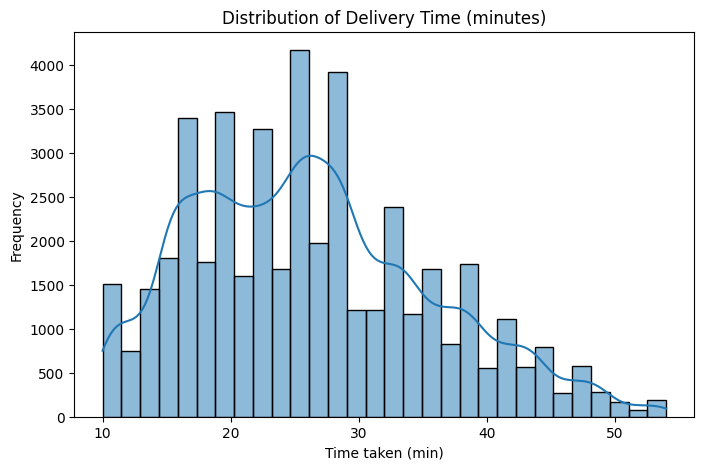

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(df['Time_taken(min)'], kde=True, bins=30)
plt.title('Distribution of Delivery Time (minutes)')
plt.xlabel('Time taken (min)')
plt.ylabel('Frequency')
plt.savefig('../reports/images/eda/delivery_time_distribution.png', dpi=100)
plt.show()

# Correlation heatmap


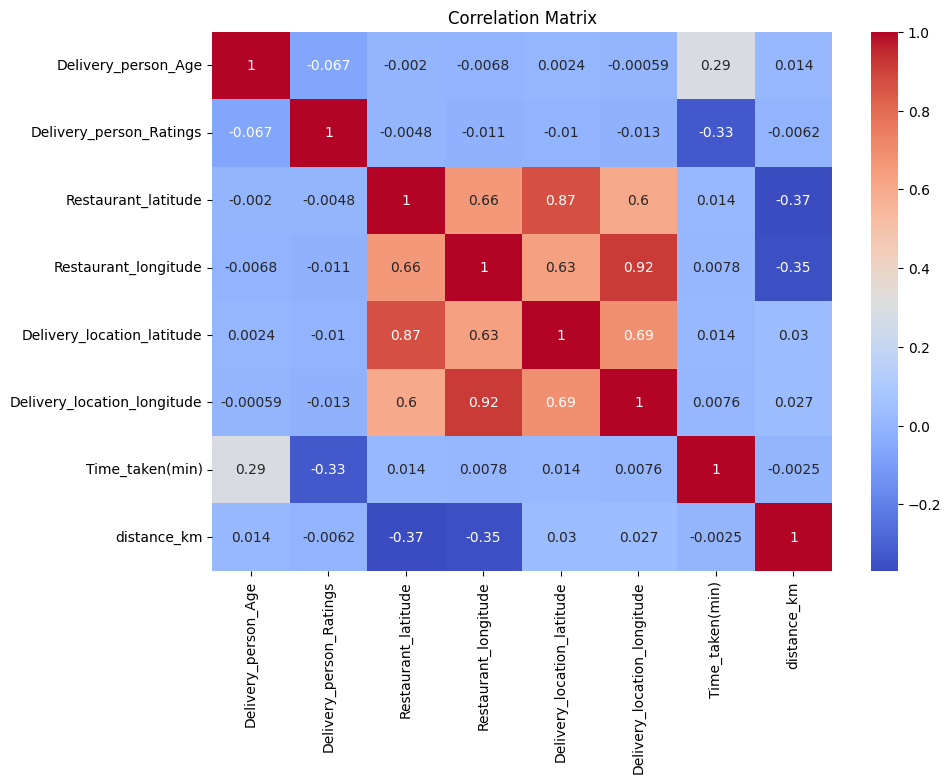

In [20]:
plt.figure(figsize=(10,7))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('../reports/images/eda/correlation_matrix_before_fe.png', dpi=100)
plt.show()

# Boxplot for categorical variables vs delivery time


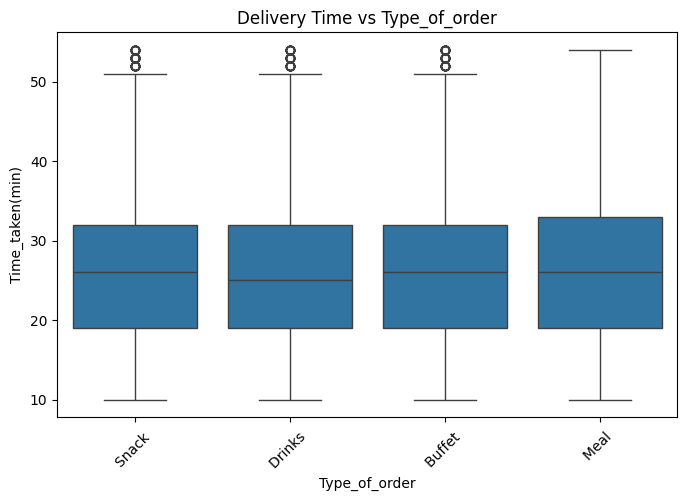

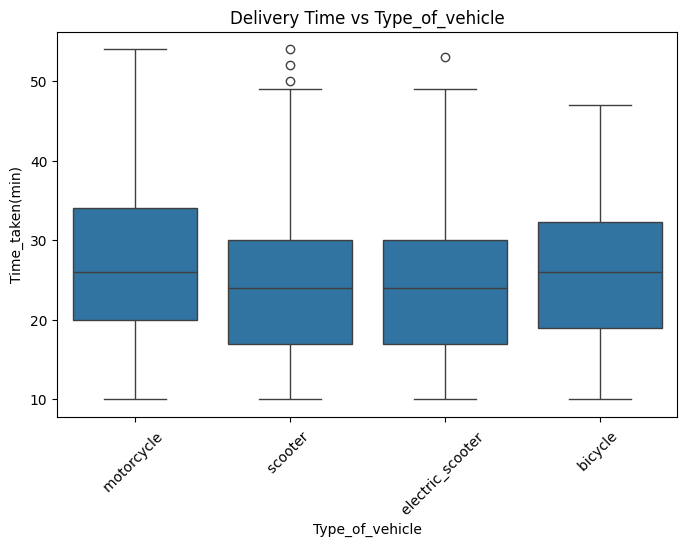

In [21]:
categorical_features = ['Type_of_order', 'Type_of_vehicle']

for feature in categorical_features:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=feature, y='Time_taken(min)', data=df)
    plt.title(f'Delivery Time vs {feature}')
    plt.xticks(rotation=45)
    plt.savefig(f'../reports/images/eda/delivery_time_vs_{feature}.png', dpi=100)
    plt.show()

# Scatter plot: Delivery Time vs Distance


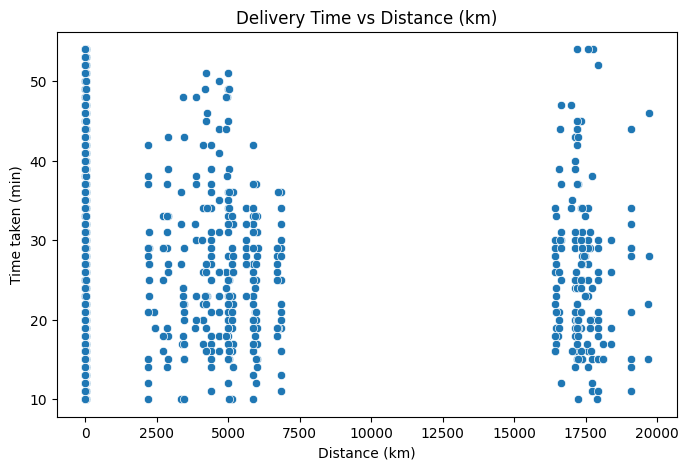

In [22]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='distance_km', y='Time_taken(min)', data=df)
plt.title('Delivery Time vs Distance (km)')
plt.xlabel('Distance (km)')
plt.ylabel('Time taken (min)')
plt.savefig('../reports/images/eda/time_vs_distance.png', dpi=100)
plt.show()

# Analyze age impact


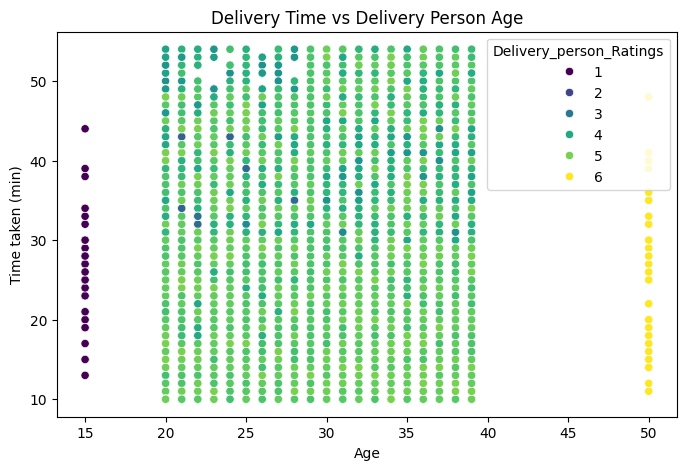

In [23]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Delivery_person_Age', y='Time_taken(min)', data=df, hue='Delivery_person_Ratings', palette='viridis')
plt.title('Delivery Time vs Delivery Person Age')
plt.xlabel('Age')
plt.ylabel('Time taken (min)')
plt.savefig('../reports/images/eda/time_vs_age_ratings.png', dpi=100)
plt.show()